---
# **💻 TIPOS DE APRENDIZADO**
**TESI3: Data Science para Mercado Financeiro**

---
* Samuel França da Costa Pedrosa
* Letícia Delfino
---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Função para Plotar a Matriz de Confusão
def plot_confusion_matrix(matrix, target_name, actual_groups, predict_groups):
  plt.figure(figsize=(8,6), dpi=100)
  ax = sns.heatmap(matrix, annot=True, fmt='d')
  ax.set_xlabel("Actual " + target_name)
  ax.xaxis.set_ticklabels(actual_groups)
  ax.set_ylabel("Predict " + target_name)
  ax.yaxis.set_ticklabels(predict_groups)
  plt.show()

# **🔼 APRENDIZADO SUPERVISIONADO**

---
## **K-Nearest Neighbors (KNN)**
---

O KNN classifica cada dado analisando a distância entre um número K de "vizinhos" (dados próximos) e incluindo na classe dominante dos vizinhos. Pode-se ou não considerar a distância do vizinho como uma métrica.

  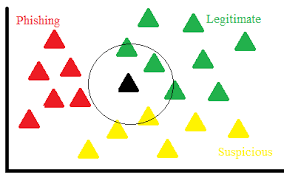

### **Exemplo Classificação**

Para exemplo prático de Classificação, é utilizado uma tabela de previsão de chuva com o Target booleano.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv")
dataset.pop("Date")
dataset.pop("Location")
dataset.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tendo a base de dados, é necessário utilizar as transformadas para mudar os dados em valores numericos. Mapeia-se os valores booleanos em 1 e 0 e os utiliza-se o One-Hot Encoder para os valores categóricos, além de preencher os valores vazios.

In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms, OneHotEncoderTransforms, TransformMapValues

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [TransformMapValues('RainTomorrow', {'Yes': 1, 'No': 0}),
                                                  TransformMapValues('RainToday', {'Yes': 1, 'No': 0}),
                                                  OneHotEncoderTransforms(['WindGustDir', 'WindDir9am', 'WindDir3pm']),
                                                  AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_transformed.drop('RainTomorrow', axis=1)
y = dataset_transformed['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

ACCURACY: 0.8238%


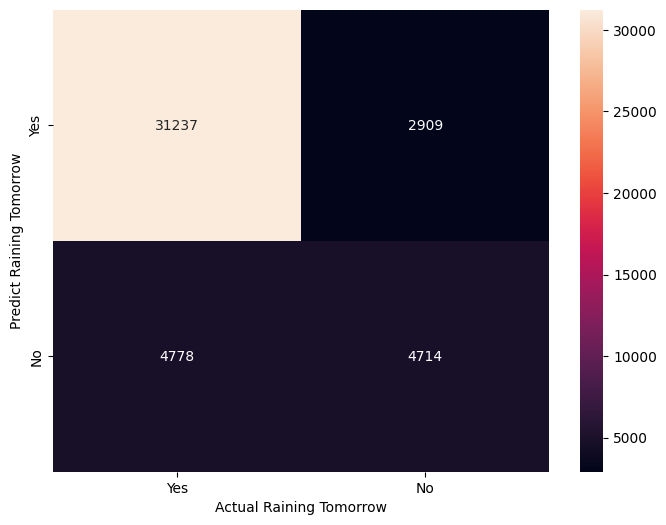

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Testing
predicts = knn.predict(X_test)

# Results
acc_knn = accuracy_score(y_test, predicts)
print(f'ACCURACY: {acc_knn:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

### **Exemplo Regressão**

Utilizando um dataset de expectativa de vida, é possível criar um modelo de regressão, já que a expectativa de vida é um valor numerico. Basta eliminar algumas colunas desnecessárias e exluir dados inconclusivos para tratamento.

In [ ]:
dataset = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")
dataset.replace("Unknown", np.nan, inplace=True)
dataset = dataset.loc[dataset["Year"] == 2015]
dataset.pop("Country")
dataset.pop("Continent")
dataset.pop("Status")
dataset.pop("Year")
dataset.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,NaN,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [AutoFillNATransforms()])
dataset_transformed.ins_transform()

Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset_transformed.drop("Life_expectancy ", axis=1), dataset_transformed["Life_expectancy "]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Utilizamos o método KNeighborsRegressor do SKLearn.

 MAX ERROR: 5.767
 MEAN ABS ERROR: 2.209
 EXPLAINED VARIANCE: 0.9029


<Axes: xlabel='Life_expectancy '>

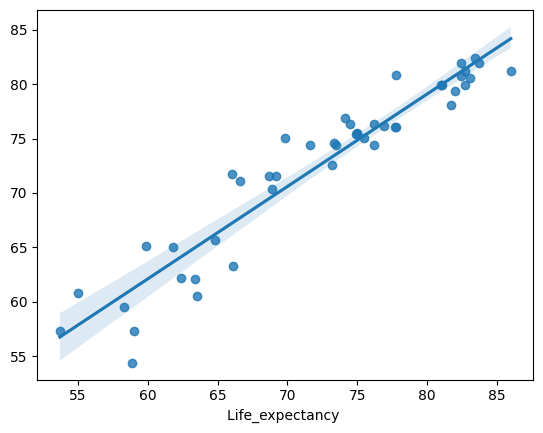

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

# Testing
predicts = knn.predict(X_test)

# Results
max_error_knn = max_error(y_test, predicts)
error_knn = mean_absolute_error(y_test, predicts)
ex_var_knn = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_knn:.4}\n MEAN ABS ERROR: {error_knn:.4}\n EXPLAINED VARIANCE: {ex_var_knn:.4}')
sns.regplot(x=y_test, y=predicts)

---
## **Naive Bayes**
---

O Naive Bayes assume que os Features não possuem relação entre sí e faz uma classificação uma por uma resultando na probabilidade da classe que a maioria das instâncias aponta. Apesar de simples, não é funcional em casos que há relação dos atributos.

### **Exemplo Classificação**

Para exemplo prático de Classificação, é utilizado uma tabela de previsão de chuva com o Target booleano.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv")
dataset.pop("Date")
dataset.pop("Location")
dataset.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tendo a base de dados, é necessário utilizar as transformadas para mudar os dados em valores numericos. Mapeia-se os valores booleanos em 1 e 0 e os utiliza-se o One-Hot Encoder para os valores categóricos, além de preencher os valores vazios.

In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms, OneHotEncoderTransforms, TransformMapValues

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [TransformMapValues('RainTomorrow', {'Yes': 1, 'No': 0}),
                                                  TransformMapValues('RainToday', {'Yes': 1, 'No': 0}),
                                                  OneHotEncoderTransforms(['WindGustDir', 'WindDir9am', 'WindDir3pm']),
                                                  AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_transformed.drop('RainTomorrow', axis=1)
y = dataset_transformed['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

ACCURACY: 73.47%


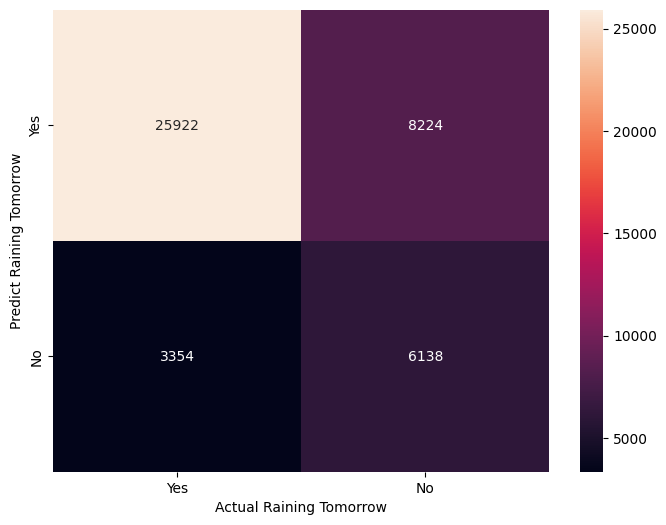

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Testing
predicts = naive_bayes.predict(X_test)

# Results
acc_nb = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_nb:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

### **Exemplo Regressão**

Utilizando um dataset de expectativa de vida, é possível criar um modelo de regressão, já que a expectativa de vida é um valor numerico. Basta eliminar algumas colunas desnecessárias e exluir dados inconclusivos para tratamento.

In [ ]:
dataset = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")
dataset.replace("Unknown", np.nan, inplace=True)
dataset = dataset.loc[dataset["Year"] == 2015]
dataset.pop("Country")
dataset.pop("Continent")
dataset.pop("Status")
dataset.pop("Year")
dataset.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,NaN,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [AutoFillNATransforms()])
dataset_transformed.ins_transform()

Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_transformed.drop("Life_expectancy ", axis=1)
y = dataset_transformed["Life_expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Naive Bayes não funciona bem para regressão, mas há sua versão para esses casos, chama **Bayesian Ridge**.

 MAX ERROR: 11.24
 MEAN ABS ERROR: 2.085
 EXPLAINED VARIANCE: 0.9005


<Axes: xlabel='Life_expectancy '>

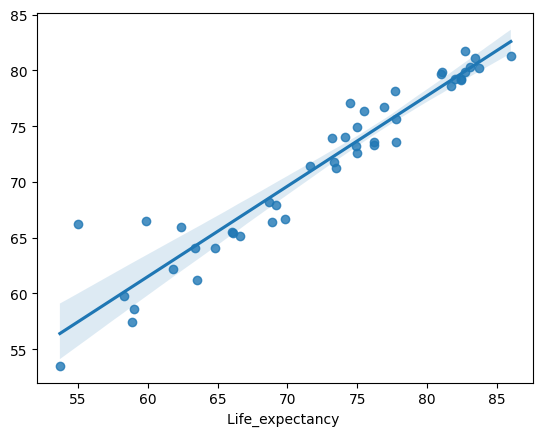

In [ ]:
from sklearn import linear_model
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

# Testing
predicts = br.predict(X_test)

# Results
max_error_br = max_error(y_test, predicts)
error_br = mean_absolute_error(y_test, predicts)
ex_var_br = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_br:.4}\n MEAN ABS ERROR: {error_br:.4}\n EXPLAINED VARIANCE: {ex_var_br:.4}')
sns.regplot(x=y_test, y=predicts)

---
## **Support Vector Machines (SVM)**
---

Nem sempre uma linha/vetor linear separa bem os dados, assim são utilizados múltiplos vetores gerados com os dados em um hiperplano (dimensão maior) para que ocorra a hiperlinearização e a classificação dos dados com o critério de similaridade (kernel trick). Sua otimização matemática considera apenas dados importantes que geram os vetores, assim consegue ser eficiente para grande conjuntos de dados.

  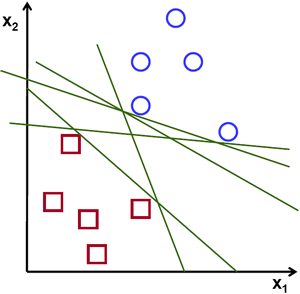

### **Exemplo Classificação**

Para exemplo prático de Classificação, é utilizado uma tabela de previsão de chuva com o Target booleano.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv")
dataset.pop("Date")
dataset.pop("Location")
dataset.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tendo a base de dados, é necessário utilizar as transformadas para mudar os dados em valores numericos. Mapeia-se os valores booleanos em 1 e 0 e os utiliza-se o One-Hot Encoder para os valores categóricos, além de preencher os valores vazios.

In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms, OneHotEncoderTransforms, TransformMapValues

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [TransformMapValues('RainTomorrow', {'Yes': 1, 'No': 0}),
                                                  TransformMapValues('RainToday', {'Yes': 1, 'No': 0}),
                                                  OneHotEncoderTransforms(['WindGustDir', 'WindDir9am', 'WindDir3pm']),
                                                  AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset_transformed.drop('RainTomorrow', axis=1), dataset_transformed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

Utilizamos o método SVC do SKLearn.

ACCURACY: 83.67%


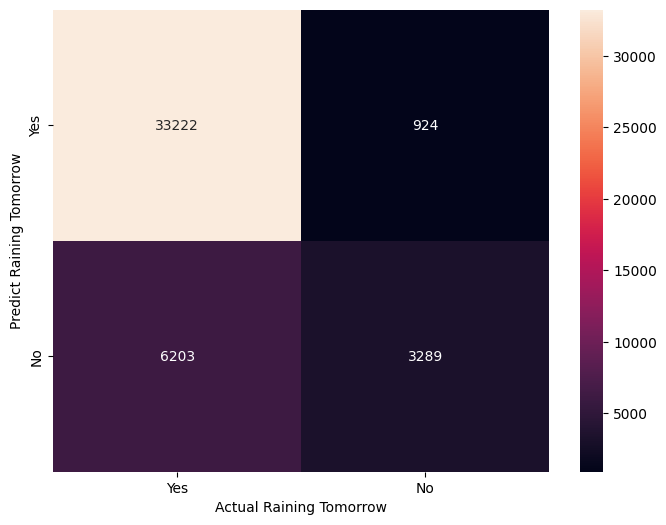

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
svm = SVC()
svm.fit(X_train, y_train)

# Testing
predicts = svm.predict(X_test)

# Results
acc_svm = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_svm:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

### **Exemplo Regressão**

Utilizando um dataset de expectativa de vida, é possível criar um modelo de regressão, já que a expectativa de vida é um valor numerico. Basta eliminar algumas colunas desnecessárias e exluir dados inconclusivos para tratamento.

In [ ]:
dataset = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")
dataset.replace("Unknown", np.nan, inplace=True)
dataset = dataset.loc[dataset["Year"] == 2015]
dataset.pop("Country")
dataset.pop("Continent")
dataset.pop("Status")
dataset.pop("Year")
dataset.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,NaN,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [AutoFillNATransforms()])
dataset_transformed.ins_transform()

Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_transformed.drop("Life_expectancy ", axis=1)
y = dataset_transformed["Life_expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Utilizamos o SVR do SKLearn.

 MAX ERROR: 14.69
 MEAN ABS ERROR: 3.946
 EXPLAINED VARIANCE: 0.6472


<Axes: xlabel='Life_expectancy '>

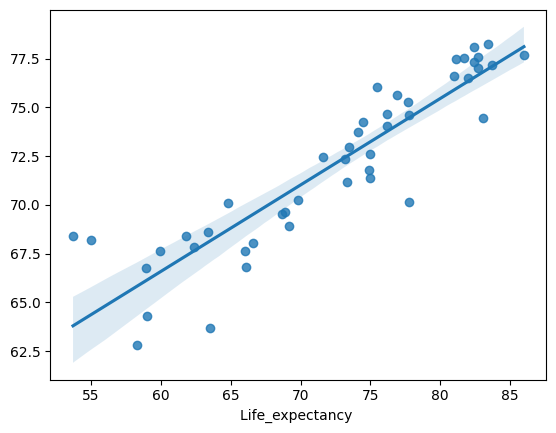

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
svm = SVR()
svm.fit(X_train, y_train)

# Testing
predicts = svm.predict(X_test)

# Results
max_error_svm = max_error(y_test, predicts)
error_svm = mean_absolute_error(y_test, predicts)
ex_var_svm = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_svm:.4}\n MEAN ABS ERROR: {error_svm:.4}\n EXPLAINED VARIANCE: {ex_var_svm:.4}')
sns.regplot(x=y_test, y=predicts)

---
## **Decision Tree e Random Forest**
---

*  **Decision Tree:** É um procedimento lógico que utiliza uma hierarquia dos Features em que quanto mais alta forem as leafs/folhas/nodes mais importantes/variantes serão, sendo as últimas já consideradas os Targets. Entre elas é utilizado um algoritmo de partição para determinar o "caminho". Extremamente simples e utiliza pouco processamento. Também pode ser chamada de Regras de Decisão com estruturas de seleção lógica.

*  **Random Florest:** Utiliza várias Decisions Trees a partir de amostras de dados coletadas aleatoriamente e obtem-se a moda/média do resultado de cada árvore da floresta. Algumas árvores podem ser descartadas se houver um teste de eficácia mínima. Mais eficiente, porém mais custoso computacionalmente.

  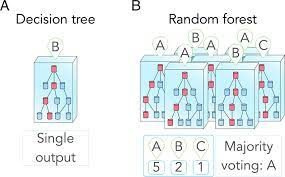

### **Exemplo Classificação**

Utilizamos como exemplo um database de previsão de chuva, tendo os targets como booleanos baseado nos features.

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv")
dataset.pop("Date")
dataset.pop("Location")
dataset.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Tendo a base de dados, é necessário utilizar as transformadas para mudar os dados em valores numericos. Mapeia-se os valores booleanos em 1 e 0 e os utiliza-se o One-Hot Encoder para os valores categóricos, além de preencher os valores vazios.

In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms, OneHotEncoderTransforms, TransformMapValues

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [TransformMapValues('RainTomorrow', {'Yes': 1, 'No': 0}),
                                                  TransformMapValues('RainToday', {'Yes': 1, 'No': 0}),
                                                  OneHotEncoderTransforms(['WindGustDir', 'WindDir9am', 'WindDir3pm']),
                                                  AutoFillNATransforms()])

dataset_transformed.ins_transform()
dataset_transformed.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,13.1,30.1,1.4,4.8,8.4,28.0,15.0,11.0,58.0,27.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = dataset_transformed.drop('RainTomorrow', axis=1), dataset_transformed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

###### **Decision Tree**

ACCURACY: 78.52%


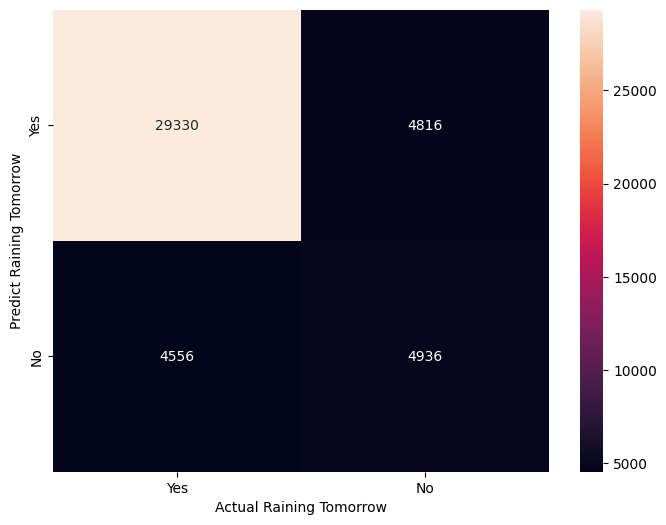

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Testing
predicts = tree.predict(X_test)

# Results
acc_tree = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_tree:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

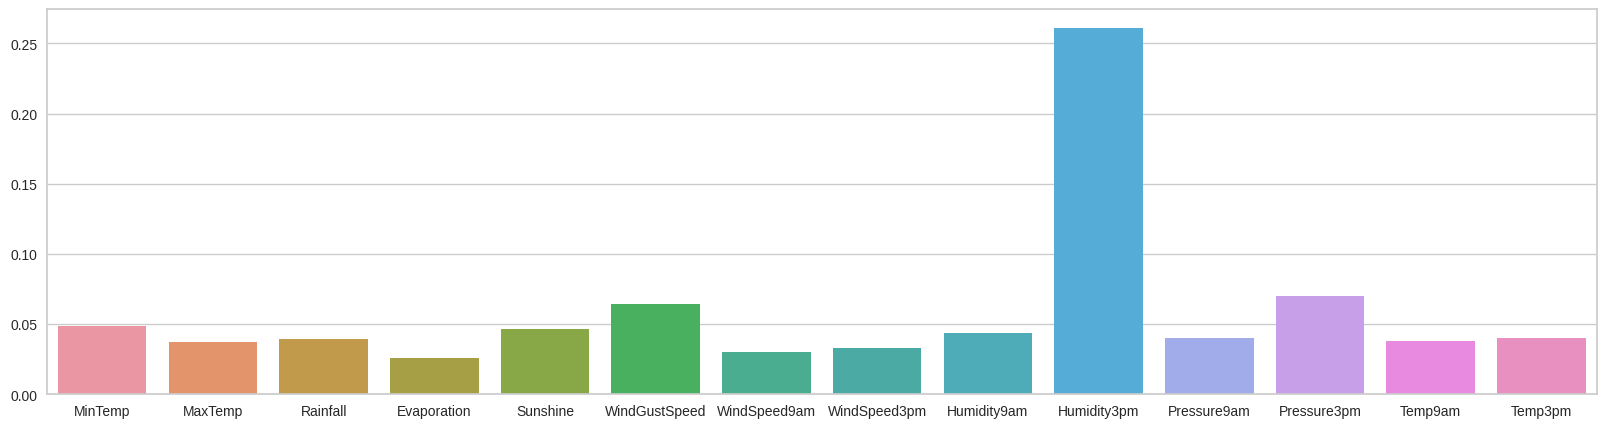

In [ ]:
features = dict(zip(X.columns, tree.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.02:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

###### **Random Florest**

ACCURACY: 85.57%


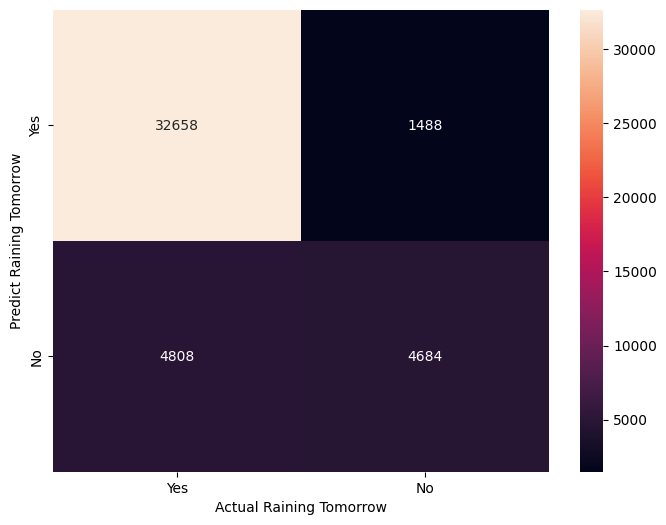

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Training
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)

# Testing
predicts = forest.predict(X_test)

# Results
acc_forest = accuracy_score(y_test, predicts)
print(f'ACCURACY: {100*acc_forest:.4}%')
cm = confusion_matrix(y_test, predicts)
plot_confusion_matrix(cm, "Raining Tomorrow", ['Yes', 'No'])

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

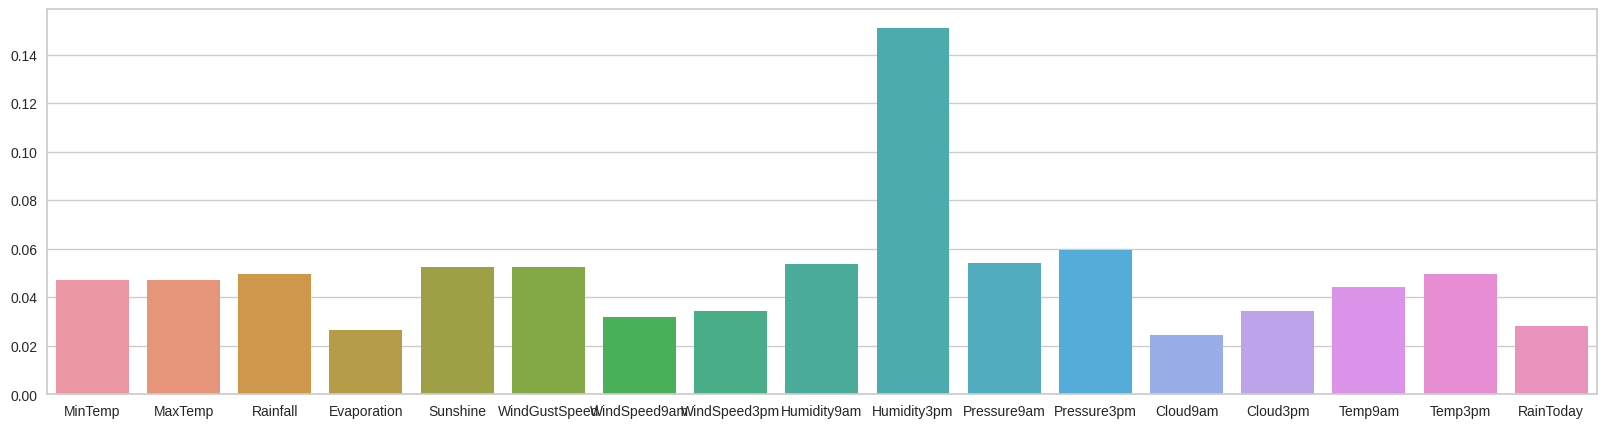

In [ ]:
features = dict(zip(X.columns, forest.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.02:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

### **Exemplo Regressão**

Utilizando um dataset de expectativa de vida, é possível criar um modelo de regressão, já que a expectativa de vida é um valor numerico. Basta eliminar algumas colunas desnecessárias e exluir dados inconclusivos para tratamento.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://gist.githubusercontent.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a/raw/8629d284e13976dcb13bb0b27043224b9266fffa/Life_Expectancy_Data.csv")
dataset.replace("Unknown", np.nan, inplace=True)
dataset = dataset.loc[dataset["Year"] == 2015]
dataset.pop("Country")
dataset.pop("Continent")
dataset.pop("Status")
dataset.pop("Year")
dataset.head(5)

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
16,77.8,74,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99,0.1,3954.227830,28873,1.2,1.3,0.762,14.2
32,75.6,19,21,0.00,0.000000,95.0,63,59.5,24,95.0,NaN,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4
48,52.4,335,66,0.00,0.000000,64.0,118,23.3,98,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
64,76.4,13,0,0.00,0.000000,99.0,0,47.7,0,86.0,NaN,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9


In [ ]:
!pip -q install insolver

In [ ]:
from insolver.frame import InsolverDataFrame
from insolver.transforms import InsolverTransform
from insolver.transforms import AutoFillNATransforms

dataset = InsolverDataFrame(dataset)
dataset_transformed = InsolverTransform(dataset, [AutoFillNATransforms()])
dataset_transformed.ins_transform()

Cria-se o Target, Features e suas versões de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X, = dataset_transformed.drop("Life_expectancy ", axis=1)
y = dataset_transformed["Life_expectancy "]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

###### **Decision Tree**

 MAX ERROR: 10.0
 MEAN ABS ERROR: 2.087
 EXPLAINED VARIANCE: 0.8931


<Axes: xlabel='Life_expectancy '>

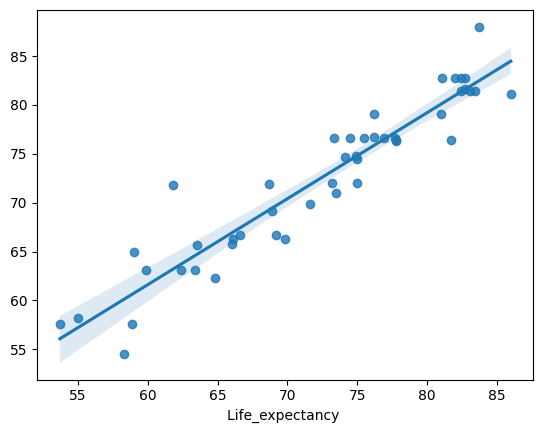

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# Testing
predicts = tree.predict(X_test)

# Results
max_error_tree = max_error(y_test, predicts)
error_tree = mean_absolute_error(y_test, predicts)
ex_var_tree = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_tree:.4}\n MEAN ABS ERROR: {error_tree:.4}\n EXPLAINED VARIANCE: {ex_var_tree:.4}')
sns.regplot(x=y_test, y=predicts)

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

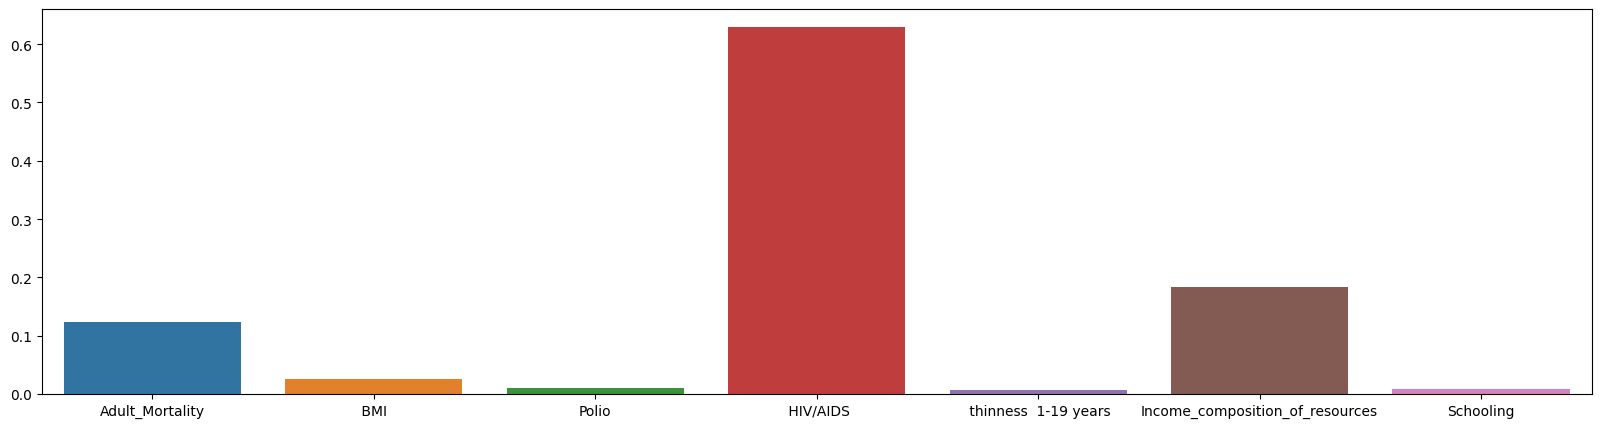

In [ ]:
features = dict(zip(X.columns, tree.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.005:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

<Axes: xlabel=' HIV/AIDS', ylabel='Life_expectancy '>

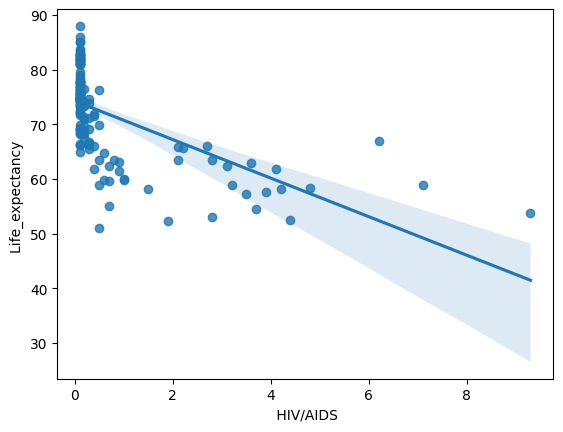

In [ ]:
sns.regplot(x=X[" HIV/AIDS"], y=y)

###### **Random Florest**

 MAX ERROR: 9.583
 MEAN ABS ERROR: 1.813
 EXPLAINED VARIANCE: 0.9091


<Axes: xlabel='Life_expectancy '>

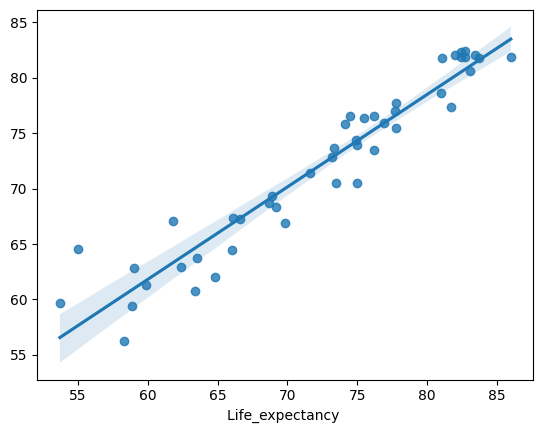

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import max_error, mean_absolute_error, explained_variance_score

# Training
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# Testing
predicts = forest.predict(X_test)

# Results
max_error_forest = max_error(y_test, predicts)
error_forest = mean_absolute_error(y_test, predicts)
ex_var_forest = explained_variance_score(y_test, predicts)
print(f' MAX ERROR: {max_error_forest:.4}\n MEAN ABS ERROR: {error_forest:.4}\n EXPLAINED VARIANCE: {ex_var_forest:.4}')
sns.regplot(x=y_test, y=predicts)

É possível saber o nível de importância de cada feature do modelo. Como há muitos features, é recomendável, para análise gráfica, descartar os features menos impactantes no modelo.

<Axes: >

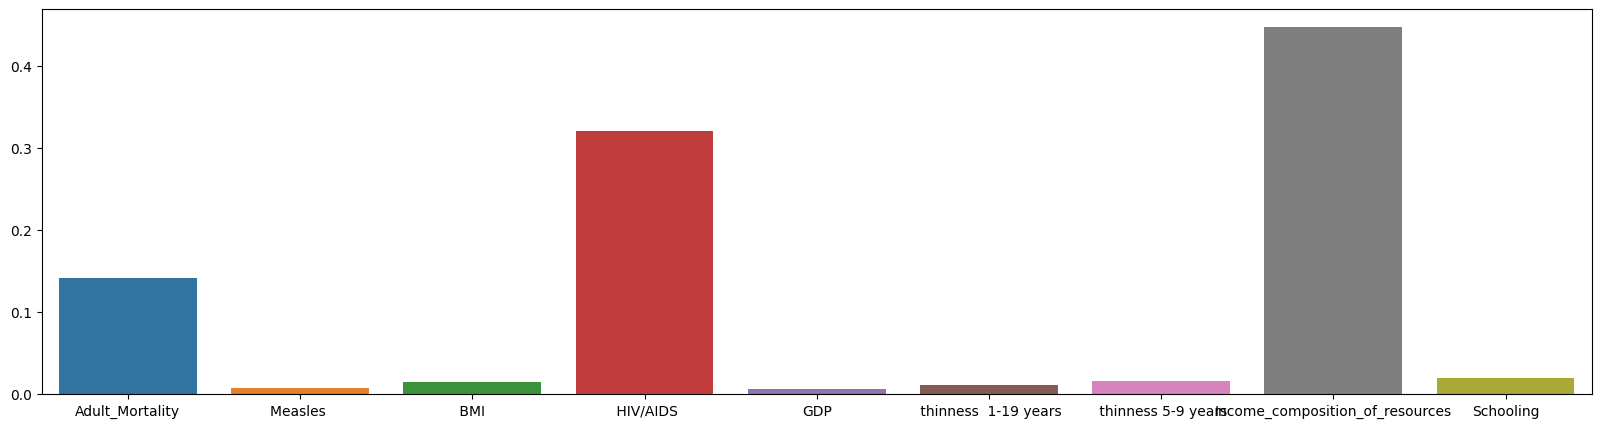

In [ ]:
features = dict(zip(X.columns, forest.feature_importances_))

important_features, cols = [], []
for feat in features:
  if features[feat] > 0.005:
    important_features.append(features[feat])
    cols.append(feat)

plt.figure(figsize=(20, 5))
sns.barplot(x=cols, y=important_features)

<Axes: xlabel='Income_composition_of_resources', ylabel='Life_expectancy '>

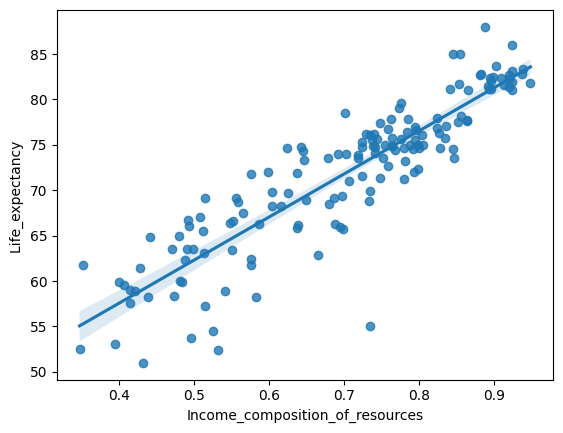

In [ ]:
sns.regplot(x=X["Income_composition_of_resources"], y=y)

---
## **Redes Neurais Artificiais**
---

As Redes Neurais Artificiais (RNAs) ou ANNs são um gancho da área de Machine Learning que pela sua complexidade, grandeza e potencial acaba sendo separada como um novo tópico. A base da ANN vem dos conhecimentos de Conexionismo que tenta representar matematicamente o processo mental por meio de redes com entradas e saídas, inspirado nos neurónios biológicos. Em 1960 o psicólogo Frank Rosenblatt criou um dispositivo elétrico imitando os princípios de uma rede neural biológica, chamado de Perceptron que acabou sendo o primeiro dispositivo computacional a conseguir aprender por tentativa e erro. Dessa forma, surge-se a área da computação Redes Neurais Artificiais que utiliza a lógica do cérebro humano como forma de aprendizado.
*  **Neurónio:** É um algoritmo que representa uma função que atua como um node com entradas e saídas, sendo as entradas afetadas por pesos.

*  **Funções de Ativação:** É a função que está no neurónio, responsável pela alteração da entrada pra saída (f(in)=out) torna a rede não-linear, alterando o caminho toda vez que é percorrida. A função com retorno booleano é chamada de Threshold e o neurónio que possui ela como função de entrada é chamado de **Perceptron**.

*  **Pesos(W):** São valores que acompanham cada entrada para o aperfeiçoamento do caminho até o resultado. Na maioria das Redes Neurais, há uma determinação do resultado encontrado sendo satisfatório, caso não seja o sinal volta alterando proporcionalmente os pesos e realizando novamente o processo até encontrar o resultado satisfatório. Isso é chamado de **Backpropagation**.

*  **Sinapses:** Conexão entre neurónios. Como as sinapses são um processo intermediário entre a Camada de Entrada e Camada de Saída, suas conexões são chamadas de Camada Oculta.

Sendo assim, uma Rede Neural é representada por três camadas, a **Camada de Entrada (Input)** com os Atributos/Features entrando nos primeiros neuronios, a **Camada Oculta (Hidden)** com os neurónios e suas sinapses e a **Camada de Saída (Output)** com os resultados da modelagem com base na entrada.

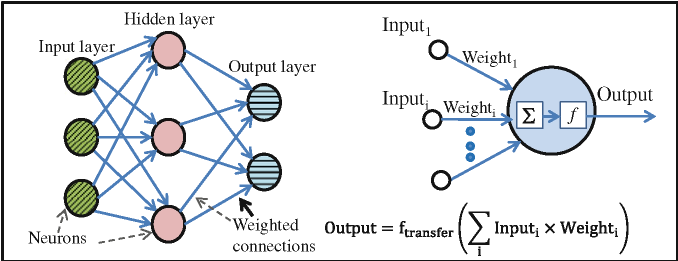

Utilizamos a base de dados **MNIST** do TensorFlow com várias imagens de reprrsentações numericas como exemplo de Deep Learning.

In [ ]:
!pip install -q tensorflow

In [ ]:
!pip install -q np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 837.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Text(0.5, 1.0, '3')

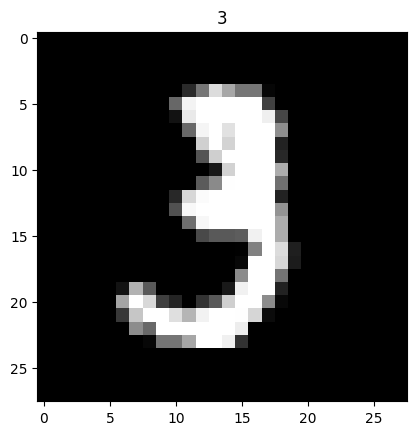

In [ ]:
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[10], cmap="gray")
plt.title(y_train[10])

A imagem está em um formato (cols x rows), é necessário vetorizar a imagem em um array unidimensional e depois normalizar. Além disso o Target está em um formato que seu último valor contem o valor numerico da imagem, é preferível trasnformar em um vetor booleano de dez posições.

In [ ]:
# Vetorização e Normalização
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train = X_train.astype("float32")
X_train = X_train/255

# Vetorização e Normalização
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test = X_test.astype("float32")
X_test = X_test/255

# Transforma o valor em um vetor booleano
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Usando o **Keras**, podemos criar as camadas e quantificar os neurônios e procedimentos.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initial Layer
model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=X_test.shape[1]))
model.add(Dropout(0,2))

# Mid Layer 1
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0,2))

# Mid Layer 2
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0,2))

# Final Layer
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dnn = model.fit(X_train, y_train, epochs=20, validation_data= (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2777 - accuracy: 0.9175 - val_loss: 0.1461 - val_accuracy: 0.9559
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1214 - accuracy: 0.9628 - val_loss: 0.1111 - val_accuracy: 0.9648
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0899 - accuracy: 0.9734 - val_loss: 0.1020 - val_accuracy: 0.9659
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9851 - val_loss: 0.0791 - val_accurac

Agora é possível fazer as previsões considerando que o maior valor/porcentagem dos targets é a saída:

313/313 [==============================] - 1s 3ms/step


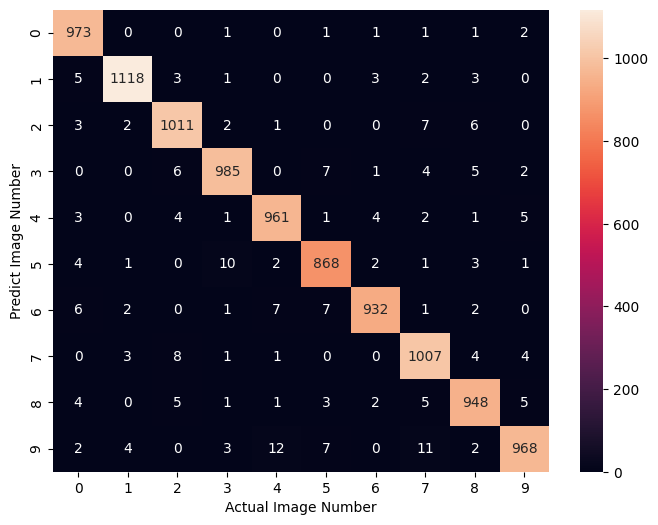

In [ ]:
from sklearn.metrics import confusion_matrix

predicts_dnn = model.predict(X_test)

y_real, y_pred = [], []
for real, pred in zip(y_test, predicts_dnn):
  y_real.append(np.argmax(real))
  y_pred.append(np.argmax(pred))

plot_confusion_matrix(confusion_matrix(y_real, y_pred), "Image Number", list(range(10)))

# **🔼 APRENDIZADO NÃO-SUPERVISIONADO**

---
## **Processamento de Linguagem Natural**
---

O Processamento de Linguagem Natural (PLN) ou (NLP) é uma área de estudo sobre os processamentos de geração e compreensão computacional de linguagens humanas naturais. A ideia de um computador compreender um texto ou comando de voz, responder no mesmo formato e até mesmo conseguir traduzir uma língua para outra sempre foi uma visão tecnológica, porém apenas na década de noventa com os avanços dos conhecimentos de aprendizado de máquina, isso começou a ser possível de uma maneira prática. Ou seja, a grande ideia do NLP é conseguir fazer uma máquina aprender as lógicas e regras da linguagem natural de forma até análoga a uma criança aprendendo a falar e escrever. Justamente por ser uma área de muito interesse, é muitas vezes colocada como uma área própria ou uma sub-área de ML.


Das diversas técnicas e formas de se ter o processamento das linguagens naturais, geralmente eles possuem características similares de etapas para organizar o processamento:

*  **Corpus:** Conjunto dos dados do texto não estruturado.

*  **NLP Model:** Modelo das lógicas e regras de uma linguagem natural específica.

* **Annotations:** Anotações de flexões, dependências e informações nas entrelinhas entre cada palavra para serem futuramente usadas. Os procedimentos seguem a ordem:
  1.   **Tokenization:** Separa os tokens (palavras ou sinais) do texto.
  2.   **Parts of Speech Tagging (POS):** Rotula os tokens conforme as regras da linguagem natural.
  3.   **Lemmatizing:** Flexiona os tokens em sua morfologia e sentido mais simples.
  4.   **Dependency Parsing:** Encontra as relações hierárquicas dos tokens e remove tokens desnecessários chamados de Stopwords.

*  **Word Embedding:** Encontra as relações dos tokens vetorizando-o e criando uma tabela de análise das proximidades morfologicas, sintáticas, semânticas e pragmáticas entre outras palavras.

*  **Processing:** Etapa de processamento contendo as técnicas de inteligência artificial com base nos dados coletados no Corpus e gerados pela Annotations. Atualmente a que está recebendo mais destaque é o Transformer.


Assim, utilizando um exemplo contendo tweets, é possível aplicar os conhecimentos com o conjunto de bibliotecas **Natural Language Toolkit (NLTK)**. Para sua utilização é recomendado utilizar uma pasta com vários arquivos de textos.

In [ ]:
!mkdir -p "/content/tweets/"

In [ ]:
database = pd.read_csv("https://raw.githubusercontent.com/Hsankesara/The-Tweets-of-Wisdom/master/tweets.csv")
database = database.dropna()

for i, text in database["tweet_content"].items():
  path = "/content/tweets" + "/tweet" + str(i) + ".txt"
  with open(path, 'w') as file:
    file.write(text)

database.head()

,author_name,created_at,handle,likes,retweets,tweet_content
0,Naval,2019-08-07 22:36:56,naval,7566,1498,"Unresolved thoughts, prematurely pushed out of..."
1,Naval,2019-08-07 05:00:38,naval,21886,5984,The modern mind is overstimulated and the mode...
2,Naval,2019-08-07 04:52:33,naval,6462,1266,The Lindy Effect for startups:\n\nThe longer y...
3,Naval,2019-08-06 08:35:26,naval,466,61,@orangebook_ This was a good tweet.
4,Naval,2019-08-06 07:33:20,naval,3971,906,Social media lowers the cost of raising &amp; ...


É possível determinar o corpus e com isso criar uma núvem de palavras para visualização:

In [ ]:
!pip install -q nltk

In [ ]:
!pip install -q wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


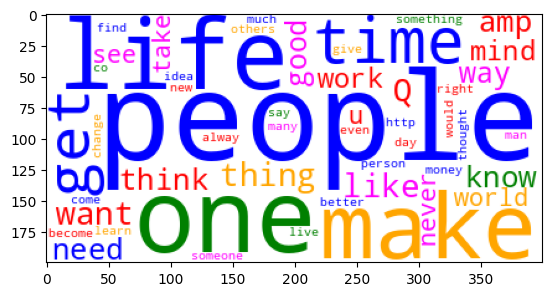

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader, stopwords
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

corpus = PlaintextCorpusReader("/content/tweets", ".*", encoding="utf-8")
stops = stopwords.words("english")

map_color = ListedColormap(["orange", "green", "red", "magenta", "blue"])
word_cloud = WordCloud(background_color="white", colormap=map_color, stopwords=stops, max_words=50)
word_cloud.generate(corpus.raw())
plt.imshow(word_cloud)


### **Transformer**

O Transformer é uma arquitetura de deep learning com grande utilização no Processamento de Linguagens Naturais por conter um mecanismo de paralelismo entra um parâmetro calculado chamado de **Attention** que é uma forma mais diâmica de Word Embedding, também chamada de Softmax-Based Attention Mechanism. Exige pouco tempo de treinamento comparado com outras redes profundas.

Foi desenvolvida oficialmente em 2017 pela Google e revolucionou as tecnologias de NLPs por ser uma base para o **Generative Pre-trained Transformer (GPT)**, utilizada em grandes modelos de linguagem natural. As GPTs foram inicialmente criadas pela OpenAI que hoje lidera o ramo das inteligências artificiais capazes de gerar novos dados a partir de um modelo pre-treinado.

As NLPs dependem da complexidade e eficiência de seus modelos para conseguir gerar resultados satisfatorios, alguns modelos estão abertos na internet, como as da [Hugging Face](https://huggingface.co/models), outros já dependem de assinaturas ou chaves, como a API da OpenAI.

Como exemplo, é utilizado um modelo de tradução chamado t5.

In [ ]:
!pip install -q transformers

In [ ]:
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

translate = pipeline('translation_en_to_fr', model=model, tokenizer=tokenizer)

In [ ]:
en_text = "This is english!"
fr_text = translate(en_text)
print(f'English: {en_text}')
print(f'French: {fr_text[0]["translation_text"]}')

English: This is english!
French: C'est anglais!


---
## **Redes Neurais Profundas**
---

O Aprendizado Profundo é uma Rede Neural com maior profundidade no aprendizado da representação dos dados, deixando de exigir a inserção de características manualmente para ser definida de forma supervisionada apenas. Em outras palavras, é uma Rede Neural Artificial com maior abstração na modelagem dos grafos com várias camadas de processamento e transformações lineares ou não.

Utilizamos a base de dados **MNIST** do TensorFlow com várias imagens de reprrsentações numericas como exemplo de Deep Learning.

In [ ]:
!pip install -q tensorflow

In [ ]:
!pip install -q np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 837.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Text(0.5, 1.0, '3')

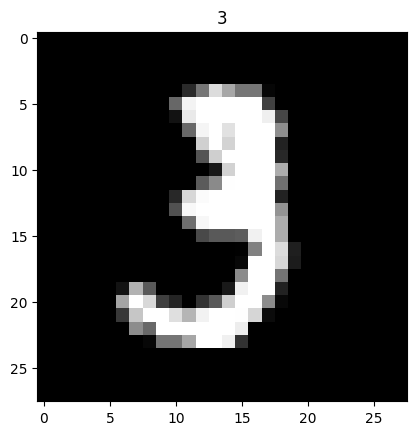

In [ ]:
from keras.utils import to_categorical
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[10], cmap="gray")
plt.title(y_train[10])

A imagem está em um formato (cols x rows), é necessário vetorizar a imagem em um array unidimensional e depois normalizar. Além disso o Target está em um formato que seu último valor contem o valor numerico da imagem, é preferível transformar em um vetor booleano de dez posições.

In [ ]:
# Vetorização e Normalização
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train = X_train.astype("float32")
X_train = X_train/255

# Vetorização e Normalização
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test = X_test.astype("float32")
X_test = X_test/255

# Transforma o valor em um vetor booleano
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Usando o **Keras**, podemos criar as camadas e quantificar os neurônios e procedimentos.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initial Layer
model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=X_test.shape[1]))
model.add(Dropout(0,2))

# Mid Layer 1
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0,2))

# Mid Layer 2
model.add(Dense(units=64, activation="relu"))
model.add(Dropout(0,2))

# Final Layer
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
dnn = model.fit(X_train, y_train, epochs=20, validation_data= (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2777 - accuracy: 0.9175 - val_loss: 0.1461 - val_accuracy: 0.9559
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1214 - accuracy: 0.9628 - val_loss: 0.1111 - val_accuracy: 0.9648
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0899 - accuracy: 0.9734 - val_loss: 0.1020 - val_accuracy: 0.9659
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9776 - val_loss: 0.0835 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.0831 - val_accuracy: 0.9757
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9851 - val_loss: 0.0791 - val_accurac

Agora é possível fazer as previsões considerando que o maior valor/porcentagem dos targets é a saída:

313/313 [==============================] - 1s 3ms/step


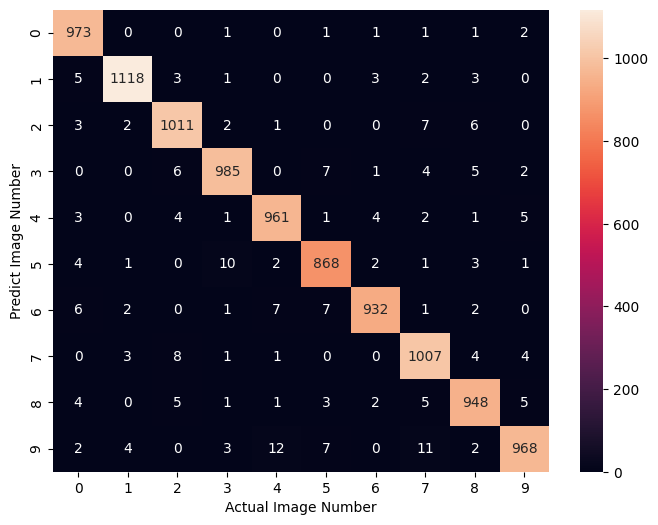

In [ ]:
from sklearn.metrics import confusion_matrix

predicts_dnn = model.predict(X_test)

y_real, y_pred = [], []
for real, pred in zip(y_test, predicts_dnn):
  y_real.append(np.argmax(real))
  y_pred.append(np.argmax(pred))

plot_confusion_matrix(confusion_matrix(y_real, y_pred), "Image Number", list(range(10)))

### **Convolutional Neural Network (CNN)**

As Redes Neurais Convolucionais são redes profundas que fazem diversas convoluções das entradas para reconhecimento de características transformando-as em vetores ou matrizes e utilizar como Camada de Entrada (Input). Inspirado no funcionamento do córtex visual biológico, o CNN é principalente usado na área de Visão Computacional para detecção de objetos em imagens, uma vez que a imagem é uma superposição de figuras que é uma das definições de convolução para matrizes. Dessa maneira, o CNN exige pouco pré-processamento quando recebe uma imagem. As etapas são:
1.   **Camada de Convoluções:** Gera diversas imagens convolucionadas de mesmo tamanho.
2.   **Camada de Pooling:** Foca em características das imagens convolucionadas e gera diversas pequenos cortes.
3.   **Flattering:** Transformações lineares ou não dos cortes criados pelo Pooling para vetores ou matrizes. Cria-se o Input da rede.
4.   **Deep Neural Network:** Com as entradas geradas pelo Flattering, inicia-se o processamento da rede neural profunda usando uma variação de perceptrons multicamada.



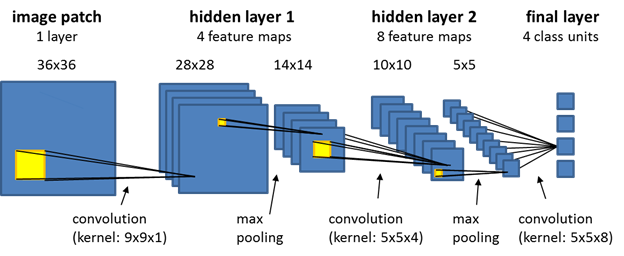

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_train = X_train.reshape(-1,28,28,1)
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_test = X_test.reshape(-1,28,28,1)
X_test = X_test.astype('float32')
X_test = X_test/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

model_cnn = Sequential()
model_cnn.add(Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
model_cnn.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
cnn = model_cnn.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1811 - accuracy: 0.9442 - val_loss: 0.0478 - val_accuracy: 0.9840
Epoch 2/20
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0649 - accuracy: 0.9802 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 3/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0322 - val_accuracy: 0.9893
Epoch 4/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 5/20
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0335 - val_accuracy: 0.9895
Epoch 6/20
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.0300 - val_accuracy: 0.9908
Epoch 7/20
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0422 -

313/313 [==============================] - 3s 10ms/step


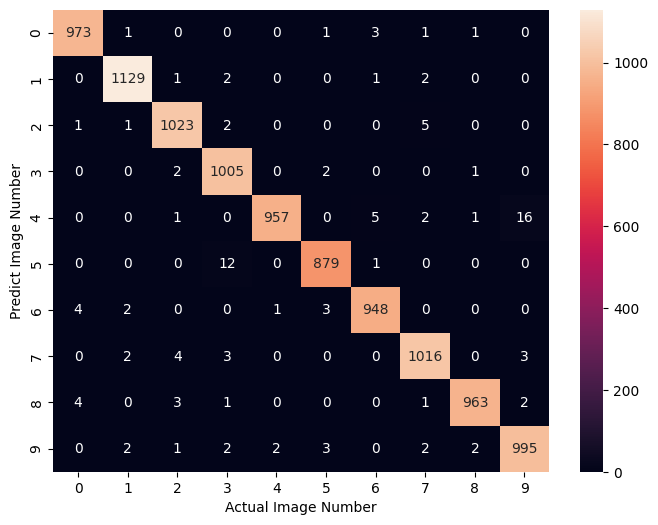

In [ ]:
from sklearn.metrics import confusion_matrix

predicts_cnn = model_cnn.predict(X_test)

y_real, y_pred = [], []
for real, pred in zip(y_test, predicts_cnn):
  y_real.append(np.argmax(real))
  y_pred.append(np.argmax(pred))

plot_confusion_matrix(confusion_matrix(y_real, y_pred), "Image Number", list(range(10)))

### **Recurrent Neural Network (RNN)**

As Redes Neurais Recorrentes são redes profundas que utilizam uma memória interna no processamento entre os neurónios, fornecendo outras informações, além das entradas, podendo afetar a saída neural, fornecendo então uma recorrência na Camada Oculta (Hidden). Ou seja, é uma rede em que processamentos e dados anteriores interferem nas análises posteriores, sendo de ideal utilização em séries temporais e processamento de linguagens.

As RNNs se diferenciam por como a recorrência funcionará e como será o armazenamento da memória pros processamentos seguintes. Das variadas formas, as mais populares são:
*  **Fully Recurrent:** Armazena todas as informações com uma recorrência completa, tendo, assim, gasto de processamento e memória muito alto.

*  **Continuous-Time Recurrent Neural Network (CTRNN):** Utiliza cálculos matemáticos de equações diferenciais ordinárias e sistemas lineares para casos com tempo contínuo.

*  **Long Short-Term Memory (LSTM):** Os erros podem ser detectados na Camada Oculta (Hidden) e voltar para serem reprocessados criando uma dinâmica profunda em seu processamento e evitando problemas no backpropagation, além de conseguir armazenar apenas as informações úteis para a recorrência, podendo ser usadas em milhares de repetições seguintes sem aumentar drasticamente o gasto computacional. É o tipo de RNN mais utilizado.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
display(dataset.head())

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
dataset.drop("Month", axis=1, inplace=True)
dataset.index.name = "Month"

X = np.array(dataset["Passengers"].values).astype('float32')
y = []
for x in X:
  y.append(x)
y.pop(0)
y.append(X[-1])
y = np.array(y).astype('float32')
dataset["Next Month Passengers"] = pd.Series(y)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

dataset.head()

,Passengers,Next Month Passengers
Month,,
0,112,118.0
1,118,132.0
2,132,129.0
3,129,121.0
4,121,135.0


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

train_size = int(len(X)*0.7)
test_size = len(X) - train_size
X_train = np.array(X[0:train_size,:])
X_test = np.array(X[train_size:len(X),:])
y_train = np.array(y[0:train_size,:])
y_test = np.array(y[train_size:len(y),:])

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of [samples, time steps, features].

Currently, the data is in the form of [samples, features], and you are framing the problem as one time step for each sample. You can transform the prepared train and test input data into the expected structure using numpy.reshape() as follows:

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

model_rnn = Sequential()
model_rnn.add(LSTM(4, input_shape=(1, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)
predicts_rnn = model_rnn.predict(X_test)

Epoch 1/100
100/100 - 4s - loss: 0.0577 - 4s/epoch - 40ms/step
Epoch 2/100
100/100 - 0s - loss: 0.0283 - 329ms/epoch - 3ms/step
Epoch 3/100
100/100 - 0s - loss: 0.0201 - 296ms/epoch - 3ms/step
Epoch 4/100
100/100 - 0s - loss: 0.0178 - 306ms/epoch - 3ms/step
Epoch 5/100
100/100 - 0s - loss: 0.0166 - 312ms/epoch - 3ms/step
Epoch 6/100
100/100 - 0s - loss: 0.0155 - 290ms/epoch - 3ms/step
Epoch 7/100
100/100 - 0s - loss: 0.0146 - 185ms/epoch - 2ms/step
Epoch 8/100
100/100 - 0s - loss: 0.0135 - 193ms/epoch - 2ms/step
Epoch 9/100
100/100 - 0s - loss: 0.0126 - 206ms/epoch - 2ms/step
Epoch 10/100
100/100 - 0s - loss: 0.0115 - 205ms/epoch - 2ms/step
Epoch 11/100
100/100 - 0s - loss: 0.0107 - 195ms/epoch - 2ms/step
Epoch 12/100
100/100 - 0s - loss: 0.0097 - 204ms/epoch - 2ms/step
Epoch 13/100
100/100 - 0s - loss: 0.0088 - 200ms/epoch - 2ms/step
Epoch 14/100
100/100 - 0s - loss: 0.0080 - 205ms/epoch - 2ms/step
Epoch 15/100
100/100 - 0s - loss: 0.0072 - 206ms/epoch - 2ms/step
Epoch 16/100
100/100 

<Axes: >

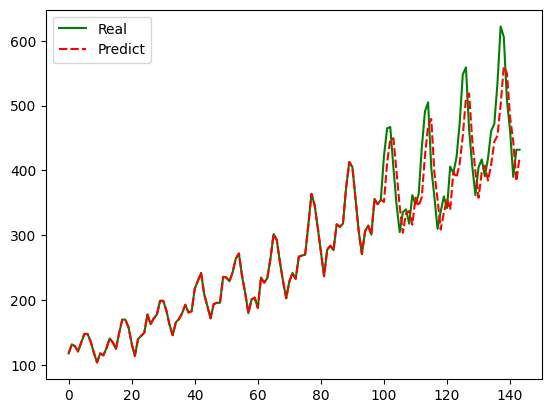

In [ ]:
y_real = scaler.inverse_transform(np.concatenate((y_train, y_test)))
y_pred = scaler.inverse_transform(np.concatenate((y_train, predicts_rnn)))
graph = pd.DataFrame({'Real': y_real.reshape(-1,), "Predict": y_pred.reshape(-1,)})
sns.lineplot(graph[["Real", "Predict"]], palette=['green', 'red'])

---
## **K-Means Clustering**
---

É uma técnica de agrupamento simples, não-ruidoso e baseada em protótipos que define um ponto para cada grupo que determina o agrupamento por menor distância euclidiana. Então, é extremamente dependente desse Ponto Comparativo para o agrupamento e tem isso como dificuldade em casos que há dificuldade de centrificação, além de precisar que a quantidade de grupos seja informada e que não tenha ruído nos dados.
*  **Ponto Comparativo do K-Means:** É a centróide da figura formada pela média de um conjunto de pontos entre os dados.
*  **Ponto Comparativo do K-Medoid:** É o dado mais representativo do conjunto de dados. Ou seja, em vez de escolher médias entre os dados, utiliza o dado como ponto, dando mais interpretabilidade.

Podemos usar como exemplo um dataset com as estatísticas de três tipos de flor íris, sendo elas Setosa, Versicolor e Virginica. Utiliza-se, então, o modelo de agrupamento para tentar prever o tipo com base nos outros atributos/Features.

In [ ]:
database = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
database.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
real_clusters = np.unique(database["variety"], return_counts=True)
num_clusters = len(real_clusters[0])
print(f'Clusters: {real_clusters[0]} \nQuantidade: {real_clusters[1]}')

Clusters: ['Setosa' 'Versicolor' 'Virginica'] 
Quantidade: [50 50 50]


Os dados precisam ser tratados, os modelos não aceitam dados vazios ou não numéricos.

In [ ]:
database.dropna()
database.replace("Setosa", 0, inplace=True)
database.replace("Versicolor", 1, inplace=True)
database.replace("Virginica", 2, inplace=True)

Usando o método **AgglomerativeClustering** do **SKLearn**, podemos gerar os clusters e suas previsões.

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters = num_clusters)
cluster.fit(database.drop("variety", axis=1))

predicts = cluster.labels_
pred_clusters = np.unique(predicts, return_counts=True)

print(f'REAL CLUSTERS: {real_clusters}')
print(f'PREDICT CLUSTERS: {pred_clusters}\n')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


REAL CLUSTERS: (array(['Setosa', 'Versicolor', 'Virginica'], dtype=object), array([50, 50, 50]))
PREDICT CLUSTERS: (array([0, 1, 2], dtype=int32), array([62, 50, 38]))



É possível analisar os resultados usando uma Matriz de Confusão:

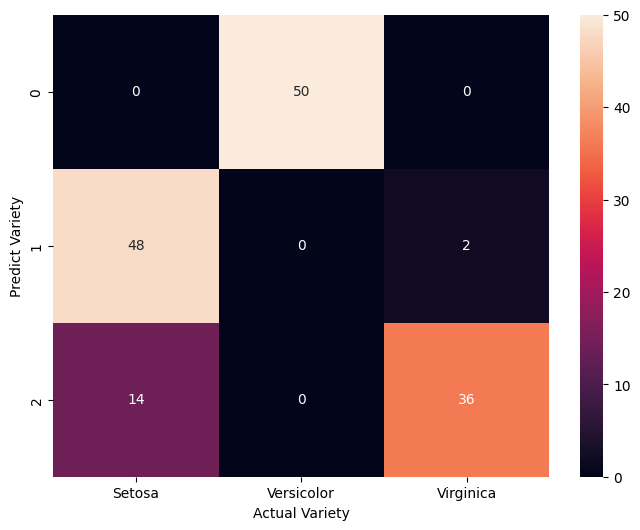

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(database["variety"], predicts)
plot_confusion_matrix(cm, "Variety", real_clusters[0], pred_clusters[0])

---
## **Agglomerative Clustering**
---

É uma técnica de aglomeração por hierarquia das similaridades entre os atributos em grupos e subgrupos. Ou seja, sequências de agrupamentos dos features semelhantemente a um dendograma terminando nas pontas consideradas os clusters finais.

No exemplo utilizamos o database com as estatísticas de três tipos de flor íris, sendo elas Setosa, Versicolor e Virginica. Utiliza-se, então, o modelo de agrupamento para tentar prever o tipo com base nos outros atributos/Features.

In [ ]:
database = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
database.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
real_clusters = np.unique(database["variety"], return_counts=True)
num_clusters = len(real_clusters[0])
print(f'Clusters: {real_clusters[0]} \nQuantidade: {real_clusters[1]}')

Clusters: ['Setosa' 'Versicolor' 'Virginica'] 
Quantidade: [50 50 50]


Os dados precisam ser tratados, os modelos não aceitam dados vazios ou não numéricos.

In [ ]:
database.dropna()
database.replace("Setosa", 0, inplace=True)
database.replace("Versicolor", 1, inplace=True)
database.replace("Virginica", 2, inplace=True)

Usando o método **AgglomerativeClustering** do **SKLearn**, podemos gerar os clusters e suas previsões.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = num_clusters)
cluster.fit(database.drop("variety", axis=1))

predicts = cluster.labels_
pred_clusters = np.unique(predicts, return_counts=True)

print(f'REAL CLUSTERS: {real_clusters}')
print(f'PREDICT CLUSTERS: {pred_clusters}\n')

REAL CLUSTERS: (array(['Setosa', 'Versicolor', 'Virginica'], dtype=object), array([50, 50, 50]))
PREDICT CLUSTERS: (array([0, 1, 2]), array([64, 50, 36]))



É possível analisar os resultados usando uma Matriz de Confusão:

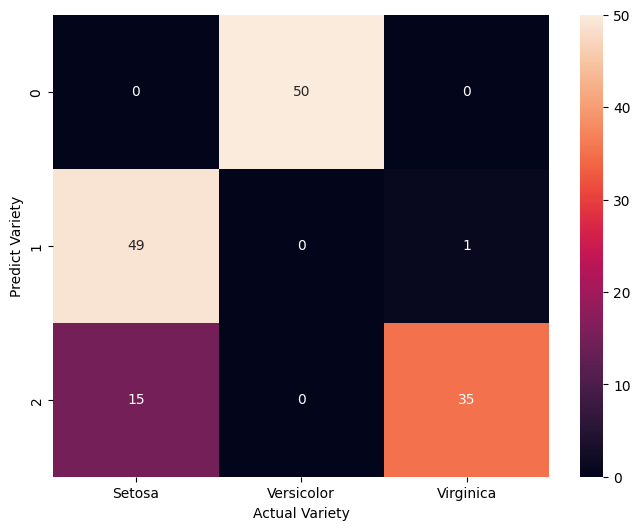

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(database["variety"], predicts)
plot_confusion_matrix(cm, "Variety", real_clusters[0], pred_clusters[0])

---
## **DBSCAN**
---

É uma técnica de agrupamento ruidosa baseada na densidade espacial do conjunto de dados. além disso, o número de grupos é definido automaticamente sem precisar ser informado. Ou seja, em vez de comparar distâncias do dado com os pontos comparativos como o K-Means, compara-se as menores distâncias entre os próprios dados agrupamando os vizinhos próximos. Os dados outliers, poucos vizinhos, ou seja, com baixa densidade, são considerados ruídos e ficam sem grupo. Então, há dificuldade em casos com grande variação de densidade por conta da formação de pequenos grupos desnecessários ou excesso de ruído. Além disso, precisa da informação do Raio de Densidade e geralmente um número mínimo para considerar uma densidade um grupo.

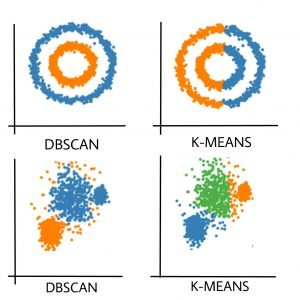

No exemplo utilizamos o database com as estatísticas de consumidores de um shopping para o agrupamento usando o DBSCAN.

In [ ]:
database = pd.read_csv("https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv")
database.drop("CustomerID", axis=1, inplace=True)
database.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Os dados precisam ser tratados, os modelos não aceitam dados vazios ou não numéricos. Além disso para a implementação gráfica, utilizamos duas variáveis.

In [ ]:
database.dropna()
X = database[["Annual Income (k$)", "Spending Score (1-100)"]]

Usando o método **DBSCAN** do **SKLearn**, podemos gerar os clusters e suas previsões.

In [ ]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=5, min_samples=5)
clusters.fit(X)

predicts = clusters.labels_ + 1
np.unique(predicts, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([87,  6, 78, 10,  9, 10]))

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

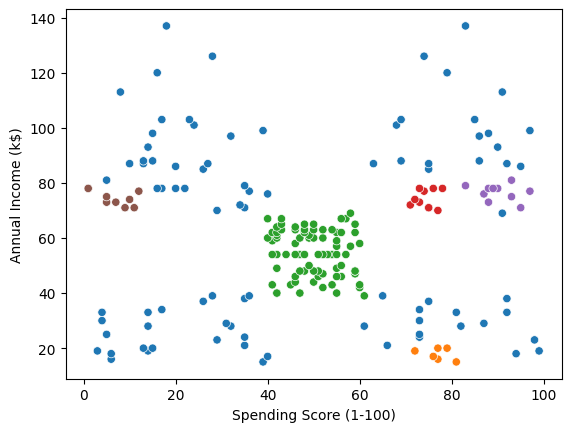

In [ ]:
sns.scatterplot(x=X["Spending Score (1-100)"], y=X["Annual Income (k$)"], hue=predicts.astype(str), legend=False)

---
## **Associação**
---

Em Associação não há uma seperação estrutural dos dados, o Target é a relação dos Features. Ou seja, a partir de um atributo, é determinado a relação com os outros atributos. Com uma base de dados o algoritmo usará estratégias para obter as relações, assim com um Feature informado, é possível determinar o grau de relação com os outros Features e aperfeiçoar essa associação com novos dados inseridos. Geralmente a relação é simbolizada como (atributo 1) -> (atributo 2) que é a relação de um Item com outro Item Relacionado.
*  **Frequência:** Porcentagem de ocorrências que um item ou conjunto de itens aparecem. É a quantidade de aparições por transação dividido pelo total.
*  **Suporte:** Frequência da correspondência da relação. É a frequência de ocorrências do Item e seu Relacionado.
*  **Confiança:** Nível de relação ou proporcionalidade de um feature com outro. É a quantidade de transações contendo o Item e seu Relacionado dividido pela quantidade de transações que o Item aparece sozinho ou não.
*  **Lift:** O quanto um feature é impactado com a ocorrência de outro. É o Suporte calculado dividido pela multiplicação da frequência do Item com a frequência do Item Relacionado.

 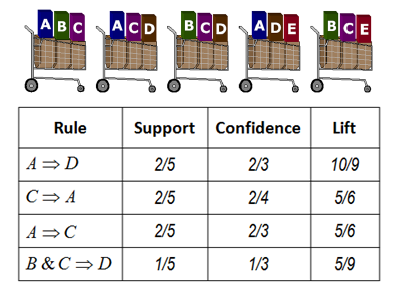

 Ou seja, o Suporte é a taxa de impacto da Confiança no todo, enquanto o Lift é um valor escalar de medição da divisão da Confiança pela Frequência do Item Relacionado. Usando um exemplo de compra de um conjunto de produtos em um supermercado, a maioria das pessoas sempre compra água, então haverá muitas relações de outros produtos com esse, tendo alta Confiança e Suporte, mas o Lift não será tão alto por ser dividido pela quantidade de compras da água. Como o foco da análise nesse exemplo é aumentar a venda de produtos relacionados, as relações não interessantes podem ser descartadas pelo Lift.

Como exemplo clássico, utilizar um dataset de Market Basket. Por padronização é recomendado transformar o dataset com as instâncias sendo compras e os atributos como os itens comprados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("https://raw.githubusercontent.com/MohdTalib0/Market-Basket-Analysis-in-Python-using-Apriori-Algorithm/main/Groceries_dataset%5B1%5D.csv")
items_name = np.unique(dataset["itemDescription"])
dataset = dataset.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))
transactions = dataset.values.tolist()
dataset.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
1001           02-05-2015                                  [frankfurter, curd]
               07-02-2014                    [sausage, whole milk, rolls/buns]
               12-12-2014                                   [whole milk, soda]
               14-04-2015                                  [beef, white bread]
               20-01-2015              [frankfurter, soda, whipped/sour cream]
Name: itemDescription, dtype: object

Há diversas estrategias/técnicas para modelar os associação, as mais populares são:

###### **Apriori**

O Apriori identifica frequência dos itens criando conjuntos de repetições e fornece uma mineração das regras de associação de um dataset. A função da biblioteca apyori recebe uma lista-matriz e encontra as relações. No caso do Market Basket é criado transactions para receber cada linha como uma compra e produtos como colunas. O Apriori é também muito utilizado em Bancos de Dados Relacionais e em Bussiness Inteligence. Pode exigir muito processamento em casos de grandes datasets com diversos atributos.

In [ ]:
!pip install -q apyori

  Preparing metadata (setup.py) ... done


In [ ]:
from apyori import apriori

transactions_apriori = transactions
rules_apriori = apriori(transactions_apriori, min_support=0.00035, min_confidence=0.15, min_lift=3, min_lenght=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


O retorno da função apriori do apyori é bem complexo com muitas informações, é recomendado utilizar uma função para transformar em uma lista ou dataframe mais compreensível:

In [ ]:
def apriori_to_dataframe(rules):
  item, related_item, support, confidence, lift = [], [], [], [], []
  for rule in list(rules):
    item.append(tuple(rule[2][0][0])[0])
    related_item.append(tuple(rule[2][0][1])[0])
    support.append(rule[1])
    confidence.append(rule[2][0][2])
    lift.append(rule[2][0][3])

  cols = ['Item', 'Related Item', 'Support', 'Confidence', 'Lift']
  return pd.DataFrame(list(zip(item, related_item, support, confidence, lift)), columns=cols)

result = apriori_to_dataframe(rules_apriori).sort_values("Lift", ascending=False)
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item,Related Item,Support,Confidence,Lift
0,brown bread,canned beer,0.000401,0.222222,4.736626
2,soda,yogurt,0.000401,0.400000,4.657743
3,citrus fruit,yogurt,0.000401,0.300000,3.493307
1,hygiene articles,whole milk,0.000401,0.545455,3.453930
4,curd,sausage,0.000468,0.205882,3.411537
5,yogurt,sausage,0.000401,0.187500,3.106935
6,pork,yogurt,0.000401,0.260870,3.037659


###### **FP-Growth (Frequent Pattern-Growth)**

O Frequent Pattern identifica as maiores frequências e relações utilizando árvores de decisão e suas sobreposições para encontrar regras de associação mais relevantes de um dataset. O FP-Growth é uma maneira que utiliza menos processamento que o Apriori sem perder muita eficiência.

A função fpgrowth do mlxtend precisa receber um dataframe booleano com as colunas, linhas e dados sendo respectivamente os itens, transações e um booleano se há ou não a presença daquela item na transação.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

transactions_fpg =  pd.DataFrame([[0 for col in range(len(items_name))] for row in range(len(transactions))], columns=items_name)
for instance, i in zip(transactions, range(len(transactions))):
  for item in instance:
    transactions_fpg[item][i] = 1

transactions_fpg.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ou utilizar a própria transformada do mlxtend para transformar uma lista matriz nesse tipo de dataframe booleano:

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder().fit(transactions)
transactions_fpg = pd.DataFrame(te.transform(transactions), columns=te.columns_)
transactions_fpg.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


O FP-Growth fornece também uma relação de mais de um Item com o seu Relacional. No caso, um conjunto de dois ou mais itens antecedentes para um item consequente, além de também fornecer os de apenas um item.

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules_fpg = fpgrowth(transactions_fpg, min_support=0.00035, use_colnames=True)
rules_fpg = association_rules(rules_fpg, metric="lift", min_threshold=1)
rules_fpg = rules_fpg.loc[(rules_fpg["lift"] > 3) & (rules_fpg["confidence"] > 0.15)]
rules_fpg.sort_values("lift", ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
499,"(hygiene articles, whole milk)",(canned beer),0.001738,0.046916,0.000401,0.230769,4.918803,0.000319,1.239010,0.798085
3035,"(brown bread, sausage)",(canned beer),0.001804,0.046916,0.000401,0.222222,4.736626,0.000316,1.225394,0.790305
4154,"(soda, chewing gum)",(yogurt),0.001002,0.085879,0.000401,0.400000,4.657743,0.000315,1.523536,0.786092
3036,"(canned beer, sausage)",(brown bread),0.002473,0.037626,0.000401,0.162162,4.309827,0.000308,1.148640,0.769876
3907,"(citrus fruit, pork)",(yogurt),0.001337,0.085879,0.000401,0.300000,3.493307,0.000286,1.305888,0.714694
498,"(hygiene articles, canned beer)",(whole milk),0.000735,0.157923,0.000401,0.545455,3.453930,0.000285,1.852570,0.710997
690,"(curd, yogurt)",(sausage),0.002272,0.060349,0.000468,0.205882,3.411537,0.000331,1.183264,0.708487
1858,"(yogurt, margarine)",(sausage),0.002139,0.060349,0.000401,0.187500,3.106935,0.000272,1.156494,0.679593
3848,"(pork, sausage)",(yogurt),0.001537,0.085879,0.000401,0.260870,3.037659,0.000269,1.236753,0.671832
